In [1]:
import os

import numpy as np
import lal
import lalsimulation
import sys
sys.path.append("../scripts")

import compute_sigmalm0_SimIMREOBGenerateQNMFreqV2 as calcqnm
import scipy

import matplotlib.pyplot as plt

plt.style.use("../papers/intro_paper/MATPLOTLIB_RCPARAMS.sty") 

In [2]:
# Define binary parameters
nqcCoeffsInput=lal.CreateREAL8Vector(10) ##This will be unused, but it is necessary
m1 = 50.0*lal.MSUN_SI
m2 = 50.0*lal.MSUN_SI
phi_c = 0.
f_start22 = 20. #Frequency of the 22 mode at which the signal starts
distance = 500e6*lal.PC_SI
spin1_z = 0.00346990177835
spin2_z =  0.0440040414498
inclination = 153.95
deltaT = 1./4096.
domega220, dtau220 = 0.5, 0.
domega210, dtau210 = 0., 0.
domega330, dtau330 = 0., 0.
domega440, dtau440 = 0., 0.
domega550, dtau550 = 0., 0.

## domega220 deviation

/home/abhirup.ghosh/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1333: UserWarning: findfont: Font family [u'Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


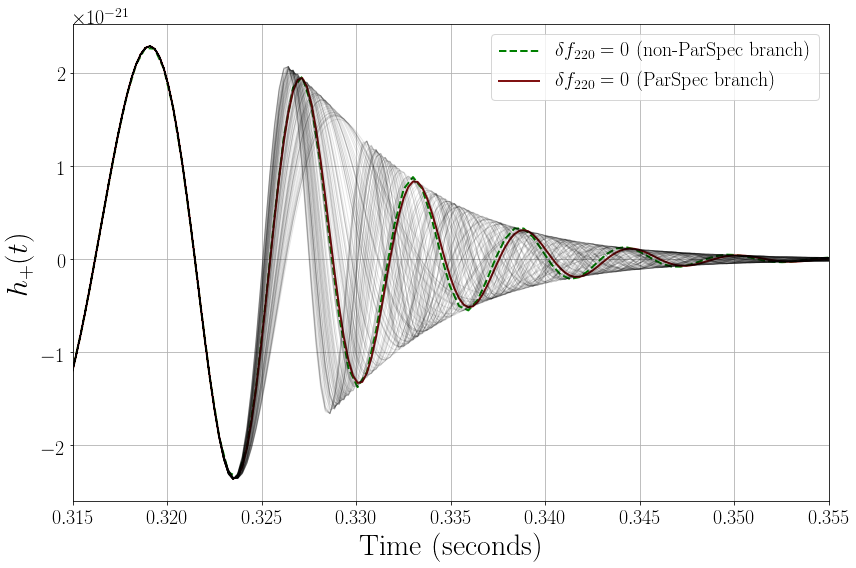

In [3]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

tnps, hpnps, hcnps = np.genfromtxt("./nonparspec_data.dat", unpack=True)
ax.plot(tnps, hpnps, color='g', lw=2.0, ls='dashed', label='$\delta f_{220} = 0$ (non-ParSpec branch)')

# plotting no deviation waveform
domega220 = 0.  
    
paramdict = lal.CreateDict()
lalsimulation.SimInspiralWaveformParamsInsertDOmega220(paramdict, domega220)
lalsimulation.SimInspiralWaveformParamsInsertDTau220(paramdict, dtau220)
lalsimulation.SimInspiralWaveformParamsInsertDOmega210(paramdict, domega210)
lalsimulation.SimInspiralWaveformParamsInsertDTau210(paramdict, dtau210)
lalsimulation.SimInspiralWaveformParamsInsertDOmega330(paramdict, domega330)
lalsimulation.SimInspiralWaveformParamsInsertDTau330(paramdict, dtau330)
lalsimulation.SimInspiralWaveformParamsInsertDOmega440(paramdict, domega440)
lalsimulation.SimInspiralWaveformParamsInsertDTau440(paramdict, dtau440)
lalsimulation.SimInspiralWaveformParamsInsertDOmega550(paramdict, domega550)
lalsimulation.SimInspiralWaveformParamsInsertDTau550(paramdict, dtau550)

hp, hc =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,  0., 0., spin1_z, 0., 0., spin2_z, distance, inclination, phi_c, 0., 0., 0., deltaT, f_start22, f_start22, paramdict, lalsimulation.SEOBNRv4HM)
h = hp.data.data - 1j*hc.data.data
time_array = np.arange(0,len(h)*deltaT,deltaT)

ampoft = np.abs(h)
phioft = np.unwrap(np.angle(h))
Foft = np.gradient(phioft)/np.gradient(time_array)/(2*np.pi)

ax.plot(time_array, hp.data.data, color='#811112', lw=2.0, label='$\delta f_{220} = 0$ (ParSpec branch)')

for idx in range(100):
    
    domega220 = np.random.rand()*2. - 1.

    paramdict = lal.CreateDict()
    lalsimulation.SimInspiralWaveformParamsInsertDOmega220(paramdict, domega220)
    lalsimulation.SimInspiralWaveformParamsInsertDTau220(paramdict, dtau220)
    lalsimulation.SimInspiralWaveformParamsInsertDOmega210(paramdict, domega210)
    lalsimulation.SimInspiralWaveformParamsInsertDTau210(paramdict, dtau210)
    lalsimulation.SimInspiralWaveformParamsInsertDOmega330(paramdict, domega330)
    lalsimulation.SimInspiralWaveformParamsInsertDTau330(paramdict, dtau330)
    lalsimulation.SimInspiralWaveformParamsInsertDOmega440(paramdict, domega440)
    lalsimulation.SimInspiralWaveformParamsInsertDTau440(paramdict, dtau440)
    lalsimulation.SimInspiralWaveformParamsInsertDOmega550(paramdict, domega550)
    lalsimulation.SimInspiralWaveformParamsInsertDTau550(paramdict, dtau550)

    hp, hc =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,  0., 0., spin1_z, 0., 0., spin2_z, distance, inclination, phi_c, 0., 0., 0., deltaT, f_start22, f_start22, paramdict, lalsimulation.SEOBNRv4HM)
    h = hp.data.data - 1j*hc.data.data
    time_array = np.arange(0,len(h)*deltaT,deltaT)

    ampoft = np.abs(h)
    phioft = np.unwrap(np.angle(h))
    Foft = np.gradient(phioft)/np.gradient(time_array)/(2*np.pi)

    ax.plot(time_array, hp.data.data, color='k', lw=1.0, alpha=0.1)

plt.xlabel('Time (seconds)')
plt.ylabel('$h_+(t)$')

plt.legend(loc='best', fontsize=20)
plt.xlim([0.315, 0.355])
plt.grid()
#plt.show()
plt.tight_layout()
plt.savefig('../plots/parspec/waveform_domega220.png')

## (domega220, dtau220) deviation

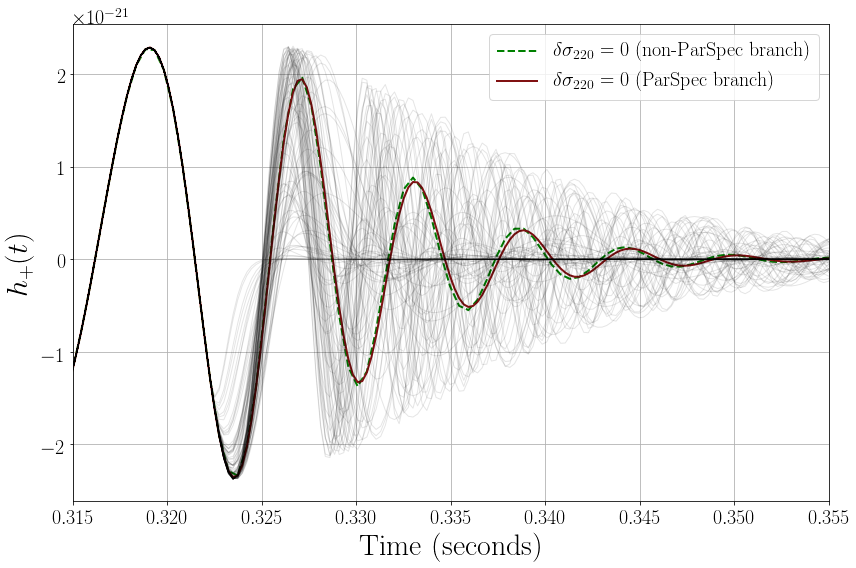

In [4]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

tnps, hpnps, hcnps = np.genfromtxt("./nonparspec_data.dat", unpack=True)
ax.plot(tnps, hpnps, color='g', lw=2.0, ls='dashed', label='$\delta \sigma_{220} = 0$ (non-ParSpec branch)')

# plotting no deviation waveform
domega220, dtau220 = 0., 0.
    
paramdict = lal.CreateDict()
lalsimulation.SimInspiralWaveformParamsInsertDOmega220(paramdict, domega220)
lalsimulation.SimInspiralWaveformParamsInsertDTau220(paramdict, dtau220)
lalsimulation.SimInspiralWaveformParamsInsertDOmega210(paramdict, domega210)
lalsimulation.SimInspiralWaveformParamsInsertDTau210(paramdict, dtau210)
lalsimulation.SimInspiralWaveformParamsInsertDOmega330(paramdict, domega330)
lalsimulation.SimInspiralWaveformParamsInsertDTau330(paramdict, dtau330)
lalsimulation.SimInspiralWaveformParamsInsertDOmega440(paramdict, domega440)
lalsimulation.SimInspiralWaveformParamsInsertDTau440(paramdict, dtau440)
lalsimulation.SimInspiralWaveformParamsInsertDOmega550(paramdict, domega550)
lalsimulation.SimInspiralWaveformParamsInsertDTau550(paramdict, dtau550)

hp, hc =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,  0., 0., spin1_z, 0., 0., spin2_z, distance, inclination, phi_c, 0., 0., 0., deltaT, f_start22, f_start22, paramdict, lalsimulation.SEOBNRv4HM)
h = hp.data.data - 1j*hc.data.data
time_array = np.arange(0,len(h)*deltaT,deltaT)

ampoft = np.abs(h)
phioft = np.unwrap(np.angle(h))
Foft = np.gradient(phioft)/np.gradient(time_array)/(2*np.pi)

ax.plot(time_array, hp.data.data, color='#811112', lw=2.0, label='$\delta \sigma_{220} = 0$ (ParSpec branch)')

for idx in range(100):
    
    domega220 = np.random.rand()*2. - 1.
    dtau220 = np.random.rand()*2. - 1.

    paramdict = lal.CreateDict()
    lalsimulation.SimInspiralWaveformParamsInsertDOmega220(paramdict, domega220)
    lalsimulation.SimInspiralWaveformParamsInsertDTau220(paramdict, dtau220)
    lalsimulation.SimInspiralWaveformParamsInsertDOmega210(paramdict, domega210)
    lalsimulation.SimInspiralWaveformParamsInsertDTau210(paramdict, dtau210)
    lalsimulation.SimInspiralWaveformParamsInsertDOmega330(paramdict, domega330)
    lalsimulation.SimInspiralWaveformParamsInsertDTau330(paramdict, dtau330)
    lalsimulation.SimInspiralWaveformParamsInsertDOmega440(paramdict, domega440)
    lalsimulation.SimInspiralWaveformParamsInsertDTau440(paramdict, dtau440)
    lalsimulation.SimInspiralWaveformParamsInsertDOmega550(paramdict, domega550)
    lalsimulation.SimInspiralWaveformParamsInsertDTau550(paramdict, dtau550)

    hp, hc =  lalsimulation.SimInspiralChooseTDWaveform(m1, m2,  0., 0., spin1_z, 0., 0., spin2_z, distance, inclination, phi_c, 0., 0., 0., deltaT, f_start22, f_start22, paramdict, lalsimulation.SEOBNRv4HM)
    h = hp.data.data - 1j*hc.data.data
    time_array = np.arange(0,len(h)*deltaT,deltaT)

    ampoft = np.abs(h)
    phioft = np.unwrap(np.angle(h))
    Foft = np.gradient(phioft)/np.gradient(time_array)/(2*np.pi)

    ax.plot(time_array, hp.data.data, color='k', lw=1.0, alpha=0.1)

plt.xlabel('Time (seconds)')
plt.ylabel('$h_+(t)$')

plt.legend(loc='best', fontsize=20)
plt.xlim([0.315, 0.355])
plt.grid()
#plt.show()
plt.tight_layout()
plt.savefig('../plots/parspec/waveform_domega220dtau220.png')